# <img style="float: left; padding-right: 10px; width: 45px" src="https://github.com/Harvard-IACS/2018-CS109A/blob/master/content/styles/iacs.png?raw=true"> CS109A Introduction to Data Science 

## Lecture 19: Using Keras and Tensorflow 2.0 

**Harvard University**<br>
**Fall 2019**<br>
**Instructors:** Pavlos Protopapas, Kevin Rader, and Chris Tanner<br>


---

In [1]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML, display
styles = requests.get("https://raw.githubusercontent.com/Harvard-IACS/2018-CS109A/master/content/styles/cs109.css").text
HTML(styles)

<div class='theme' > Keras and TENSORFLOW 2.0 </div>

In this tutorial we will repeat what we have done in Lecture 18, exercise but now use keras as part of the tensorflow 2.0.

TensorFlow is a framework for representing complicated DNN algorithms and executing them in any platform, from a phone to a distributed system using GPUs. Developed by Google Brain, TensorFlow is used very broadly today. 

**[`keras`](https://keras.io/)**, is a high-level API used for fast prototyping, advanced research, and production. We will use `tf.keras` which is TensorFlow's implementation of the `keras` API.

### Models are assemblies of layers

The core data structure of Keras is a **model**, a way to organize layers. A model is understood as a sequence or a graph of standalone, fully-configurable modules that can be plugged together with as few restrictions as possible. In particular, neural layers, cost functions, optimizers, initialization schemes, activation functions, regularization schemes are all standalone modules that you can combine to create new models.

The simplest type of model is the **Sequential** model, a linear stack of layers. For more complex architectures, one can use the Keras **Functional** API, which allows to build arbitrary graphs of layers.

https://keras.io/models/model/

Everything you need to know about the Sequential model is here: https://keras.io/models/sequential/


### Tensorflow  Installation
Just a quick reminder, in Lecture 18 ex1 and ex2 we combine neurons and we adjusted the weights manually to produce a function that looks like a guassian. In this demo we will first do exactly the same as in the exercise but now use TF. At the end we will ask TF (nicely) to find the weights for us. How this is done behind the scenes will be explained in Lecture 20. For now we are only looking at the mechanics. 

https://www.tensorflow.org/install/

pip install tensorflow=2.0

In [2]:
# usual imports 
import numpy as np
import matplotlib.pyplot as plt

#import tensorflow 
import tensorflow as tf
 

#### Instructions for running `tf.keras` with Tensorflow 2.0:  

All references to Keras should be written as `tf.keras`.  For example: 

```
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
              
tf.keras.models.Sequential
tf.keras.layers.Dense, tf.keras.layers.Activation, 
tf.keras.layers.Dropout, tf.keras.layers.Flatten, tf.keras.layers.Reshape
tf.keras.optimizers.SGD
tf.keras.preprocessing.image.ImageDataGenerator
tf.keras.regularizers
tf.keras.datasets.mnist   
```


In [3]:
# You can avoid the long names by using
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import models

In [4]:
#check if the correct version of tensorflow is used
tf.__version__

'2.0.0'

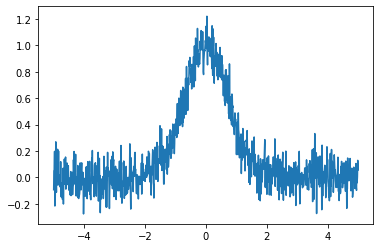

In [5]:
# generate data 

x = np.linspace(-5,5,1000)
y_real = np.exp( - (x**2)) + np.random.normal(loc=0, scale=0.1, size=x.shape)
plt.plot(x,y_real)

## First model: one neuro 

<img src='../../../lectures/lecture19/fig/SingleNeuron.png'  height="442" width="442"></img>


Build by hand

In [6]:
#reset the model 

model = models.Sequential()

# hidden layer (and output layer), one neuron 
model.add(layers.Dense(1, activation='sigmoid', input_shape=(1,)))

weights = model.get_weights()
# set the weights by hand as before
weights[0][0]=1       # weight 
weights[1][0]=-0.4    # bias 

model.set_weights(weights)

In [7]:
# check if the network is what we expected
# Summary 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


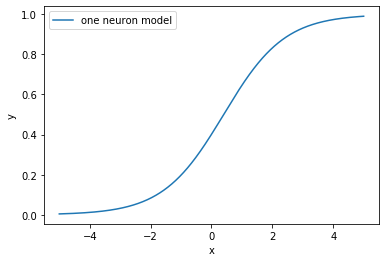

In [8]:
# predict 
y_oneneuron = model.predict(x)

# plot 
plt.plot(x,y_oneneuron, label='one neuron model')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

### Two layers as 
<img src='../../../lectures/lecture19/notes/multiple-perceptrons.png'  height="542" width="542"></img>


In [9]:
#reset the model 
model = models.Sequential()

# hiddeb layer with 2 nodes 
model.add(layers.Dense(2, activation='sigmoid', input_shape=(1,)))


# output layer, one neuron 
model.add(layers.Dense(1,  activation='linear'))

#Weights 
weights = model.get_weights()
# hidden layer
weights[0][0]=np.array([ 1.5,-2.4]) #weights 
weights[1]=np.array([-0.4,2.0]) # biases
# output layer 
weights[2]=np.array([[3],[3]]) # weights
weights[3] = np.array([-3])    # bias

model.set_weights(weights)

In [10]:
# Again check the network to make sure is what we expeected 
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2)                 4         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 3         
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________


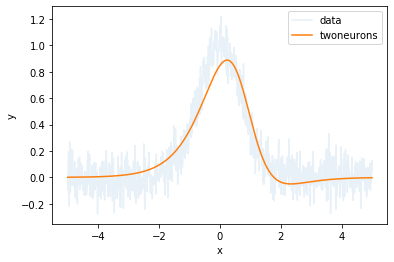

In [11]:
y_twoneurons = model.predict(x)

plt.plot(x, y_real, alpha=0.1, label='data')
plt.plot(x,y_twoneurons, label='twoneurons')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

## Now let Tensorflow do the job finding the weights 

In [12]:
#reset the model 
model_tf = models.Sequential()

# hiddeb layer with 2 nodes 
model_tf.add(layers.Dense(2, activation='sigmoid', input_shape=(1,)))


# output layer, one neuron 
model_tf.add(layers.Dense(1,  activation='linear'))

In [13]:
model_tf.compile(loss='MSE')
history = model_tf.fit(x,y_real, epochs=400, batch_size=32, verbose=0)

In [14]:
y_tf = model_tf.predict(x)

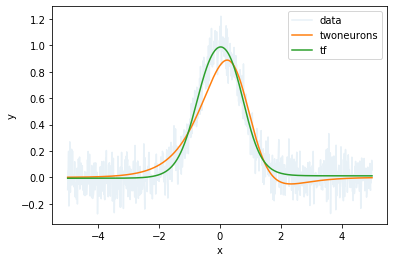

In [15]:
plt.plot(x, y_real, alpha=0.1, label='data')
plt.plot(x,y_twoneurons, label='twoneurons')
plt.plot(x,y_tf, label='tf')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [16]:
weights_tf = model_tf.get_weights()

print("TF weights:\n", weights_tf)
print()
print("my weights:\n", weights)

TF weights:
 [array([[ 3.006871 , -3.2705882]], dtype=float32), array([2.229914 , 2.4781907], dtype=float32), array([[1.2017372],
       [1.1835111]], dtype=float32), array([-1.1898862], dtype=float32)]

my weights:
 [array([[ 1.5, -2.4]], dtype=float32), array([-0.4,  2. ]), array([[3],
       [3]]), array([-3])]
